In [1]:
# Initialisation des librairies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#  1- Explorer et analyser les données

In [2]:
# Chargement des données
# url: https://1drv.ms/t/s!AmJGbSlW18YGssBeEXrgLxvhFbs78w?e=FNv5zF
insurance_datas = pd.read_csv('datas/insurance.txt')
pd.set_option('display.max_columns', None)
insurance_datas.head(20)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


###### Afficher le nombre de ligne et de colonne

In [3]:
# Nombre de ligne et de colonne
insurance_datas.shape

(1338, 7)

In [4]:
# Afficher le nom des colonnes
insurance_datas.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

###### Vérifier et supprimer les données sont duppliqués

In [5]:
# Vérifier et supprimer les données sont duppliqués
sum_dup = insurance_datas.duplicated().sum()
print('Nb duppli avant: ' + str(sum_dup))
if(sum_dup > 0):
    insurance_datas = insurance_datas.drop_duplicates()
    print('Nb duppli après: ' + str(insurance_datas.duplicated().sum()))

Nb duppli avant: 1
Nb duppli après: 0


###### Vérifier les valeurs nulles

In [6]:
# Vérifier les valeurs nulles
insurance_datas.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

### Observations: 
Il n'y a pas de données nulles dans le dataset. C'est une bonne chose!

###### Quelques informations sur les variables numériques

In [7]:
# Quelques informations sur les variables numériques
insurance_datas.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


### Observations :
La colonne children n'est pas pertinente ici avec le describe. Mais pour l'age, bmi et expenses on obtient des informations interessantes comme la moyenne pour l'age, l'indice de masse corporelle et les frais médicaux.

###### Distribution de la colonne expenses

/home/yannis/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution des frais médicaux')

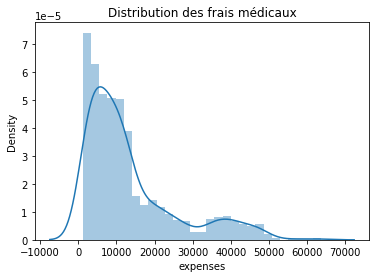

In [8]:
# Distribution de la colonne expenses
sns.distplot(a=insurance_datas.expenses, hist=True, kde=True )
plt.title('Distribution des frais médicaux')

### Observations : 
Le graphique affiche à la fois un histogramme et une estimation de la densité pour visualiser la répartition des frais médicaux. Ainsi on constate que la majorité des client dépense environ moins de 18000 dollars en frais médicaux.

###### Consulter la distribution par âge

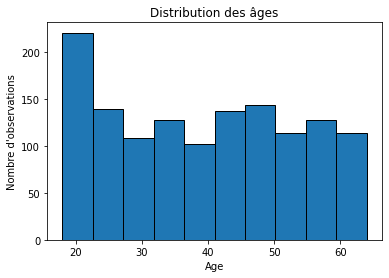

In [9]:
# Consulter la distribution par âge
plt.hist(insurance_datas['age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Nombre d\'observations')
plt.title('Distribution des âges')
plt.show()

### Observations :
Les jeunes d'environ 20 ans sont majoritairement client chez l'assurance maladie. Au delà, la répartition semble équilibrée.

###### Consulter la distribution par sexe

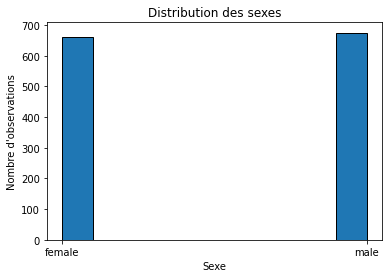

In [10]:
# Consulter la distribution par sexe
plt.hist(insurance_datas['sex'], bins=10, edgecolor='black')
plt.xlabel('Sexe')
plt.ylabel('Nombre d\'observations')
plt.title('Distribution des sexes')
plt.show()

### Observations : 
Le sexe n'est pas une données pertinente car la distribution est équitable.

###### Consulter la distribution par nombre d'enfants

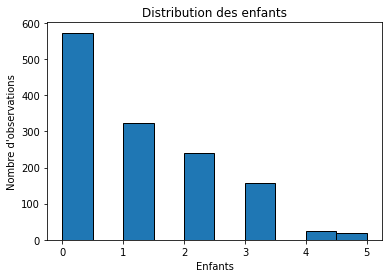

In [11]:
# Consulter la distribution par nombre d'enfants
plt.hist(insurance_datas['children'], bins=10, edgecolor='black')
plt.xlabel('Enfants')
plt.ylabel('Nombre d\'observations')
plt.title('Distribution des enfants')
plt.show()

### Observations : 

Les clients n'ayant pas ou peu d'enfants représentent la majorité des clients.

###### Diagramme de dispersion pour les frais médicaux en fonction de l'âge

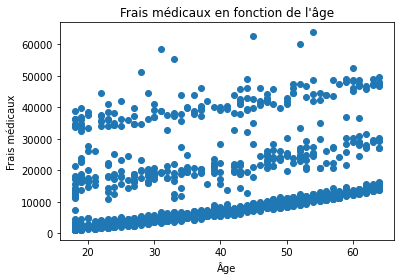

In [12]:
# Diagramme de dispersion pour les frais médicaux en fonction de l'âge
plt.scatter(insurance_datas['age'], insurance_datas['expenses'])
plt.xlabel('Âge')
plt.ylabel('Frais médicaux')
plt.title('Frais médicaux en fonction de l\'âge')
plt.show()

### Observations: 
Les frais médicaux semble avoir une certaine corrélation avec l'âge.

###### Visualiser la répartition des frais par régions

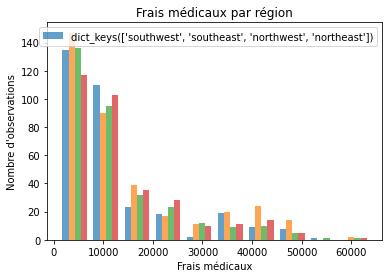

In [13]:
# Visualiser la répartition des frais par régions

# Création d'un dictionnaire pour stocker les charges médicales par région
charges_par_region = {}
for region in insurance_datas['region'].unique():
    charges_par_region[region] = insurance_datas[insurance_datas['region'] == region]['expenses']

# Création de l'histogramme
plt.hist(charges_par_region.values(), bins=10,label=charges_par_region.keys(), alpha=0.7)
plt.xlabel('Frais médicaux')
plt.ylabel('Nombre d\'observations')
plt.title('Frais médicaux par région')
plt.legend()
plt.show()

###### Calcul des frais médicaux moyennes par région

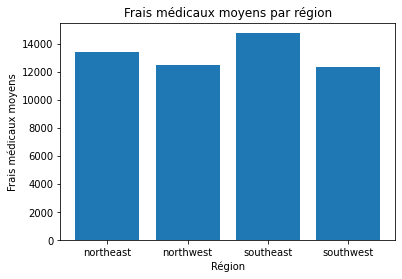

In [14]:
# Calcul des frais médicaux moyennes par région
charges_moyennes_par_region = insurance_datas.groupby('region')['expenses'].mean()

# Création du diagramme à barres
plt.bar(charges_moyennes_par_region.index, charges_moyennes_par_region.values)
plt.xlabel('Région')
plt.ylabel('Frais médicaux moyens')
plt.title('Frais médicaux moyens par région')
plt.show()

###### Répartition par régions et par sexe

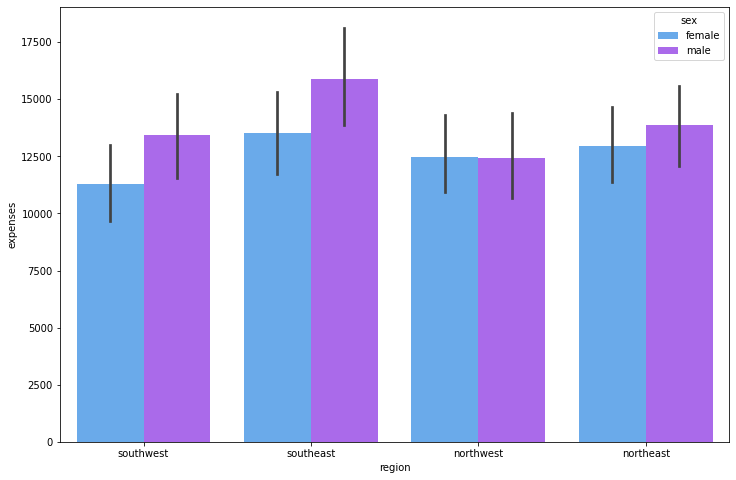

In [15]:
# Répartition par régions et par sexe
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='expenses', hue='sex', data=insurance_datas, palette='cool')

### Observations :

Les frais médicaux ne semblent pas dépendre d'une région en particulier et du sexe. Car il n'y a pas une grande différence entre les régions et le sexe.

###### Diagramme de dispersion pour les frais médicaux en fonction de l'IMC

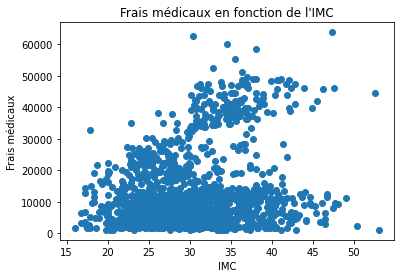

In [16]:
# Diagramme de dispersion pour les frais médicaux en fonction de l'IMC
plt.scatter(insurance_datas['bmi'], insurance_datas['expenses'])
plt.xlabel('IMC')
plt.ylabel('Frais médicaux')
plt.title('Frais médicaux en fonction de l\'IMC')
plt.show()

### Observations : 
- La majorité des clients semble avoir un IMC normal
- Un IMC élevé est signe de frais médicux élevées.


###### # Analyse des frais médicaux par âge, IMC et enfants en fonction du facteur tabagisme.


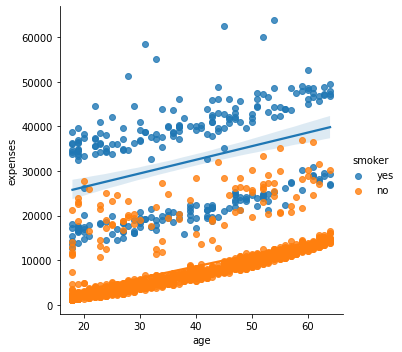

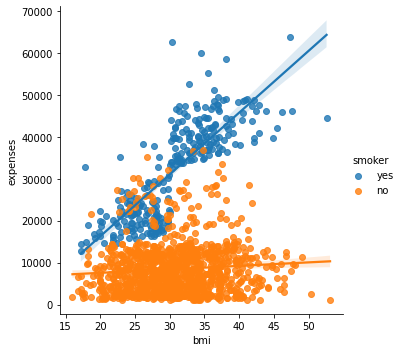

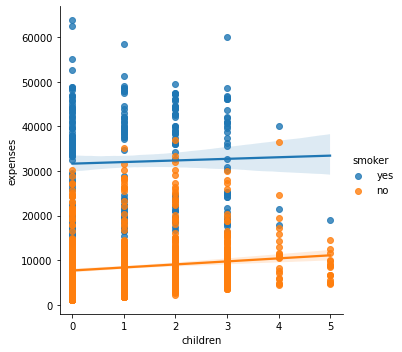

In [17]:
# Analyse des frais médicaux par âge, IMC et enfants en fonction du facteur tabagisme.
ax = sns.lmplot(x = 'age', y = 'expenses', data=insurance_datas, hue='smoker')
ax = sns.lmplot(x = 'bmi', y = 'expenses', data=insurance_datas, hue='smoker')
ax = sns.lmplot(x = 'children', y = 'expenses', data=insurance_datas, hue='smoker')

### Observations :

Fumer est un facteur important des frais médicaux. On constate dans les 3 graphiques précédents que ceux qui fument ont des frais médicaux plus élevés.

###### Graphique de correlation

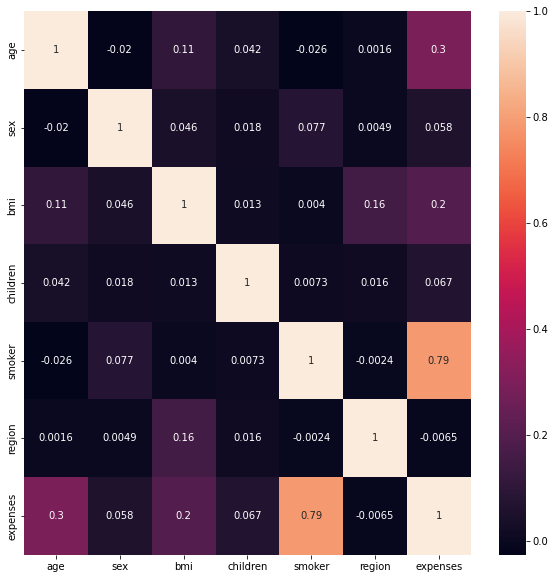

In [18]:
# Graphique de correlation

from sklearn.preprocessing import LabelEncoder
# Convertion des variables catégorielles en données numériques
label = LabelEncoder()
label.fit(insurance_datas.sex.drop_duplicates())
insurance_datas.sex = label.transform(insurance_datas.sex)
label.fit(insurance_datas.smoker.drop_duplicates())
insurance_datas.smoker = label.transform(insurance_datas.smoker)
label.fit(insurance_datas.region.drop_duplicates())
insurance_datas.region = label.transform(insurance_datas.region)
# Matrice de correlation
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(insurance_datas.corr(), annot=True)

### Observations:

La matrice de corrélation confirme les observations précédement obtenues. Fumer est le facteur le plus important pour les frais médicaux. On peux ensuite ajouter l'age et l'indice de masse corporelle.

# 2 - Préparation des données pour l'entraînement

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Séparer les features et les labels dans deux variables X et Y.

En gardant juste les variables les plus corrélées (age, smoker, et bmi)

In [20]:
X = insurance_datas[['age', 'bmi', 'smoker']]
Y = insurance_datas['expenses']

In [21]:
X

,age,bmi,smoker
0,19,27.9,1
1,18,33.8,0
2,28,33.0,0
3,33,22.7,0
4,32,28.9,0
...,...,...,...
1333,50,31.0,0
1334,18,31.9,0
1335,18,36.9,0
1336,21,25.8,0


# 3- Entraîner une régression linéaire

Séparer les données en deux sous-ensembles : 
- 75% : Données entrainements
- 25% :Données tests

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=42)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 1002 rows
Test Set: 335 rows


Entrainement du model

In [23]:
model1 = LinearRegression()
model1.fit(X_train, Y_train)

LinearRegression()

# 4- Évaluer le modèle

Evaluation 1 - Prédictions1 sur l'ensemble de données de test avec la méthode "score" pour déterminer la performance du modèle (R2).

In [24]:
predictions1 = model1.predict(X_test)
np.set_printoptions(suppress=True)
r2_predict1 = model1.score(X_test, Y_test)
print('[Prediction1] Score R2: ', r2_predict1)

[Prediction1] Score R2:  0.7940114353130536


Evaluation 2 - Prediction 2, en calculant la moyenne des erreurs au carré entre les predictions du modèle et les valeurs rééles. On obtiendra l'erreur quadratique et aussi un score R2

In [25]:
predictions2 = model1.predict(X_test)
rmse = np.sqrt(mean_squared_error(predictions2, Y_test))
r2_predict2 = r2_score(Y_test, predictions2)
print('L\'erreur quadratique moyenne est {}'.format(rmse))
print('[Prediction2] Score R2 est {}'.format(r2_predict2))

L'erreur quadratique moyenne est 5968.035276592003
[Prediction2] Score R2 est 0.7940114353130536


### Observations:

Il y a aucune différence entre les deux scores R2 de prédictions1 et prédictions2. A savoir que l'évaluation du modèle avec les métriques en prédictions2 est normalement plus approfondie. Ce qui assure la performance du modèle.

Visualiser un graphique qui compare les prédictions :

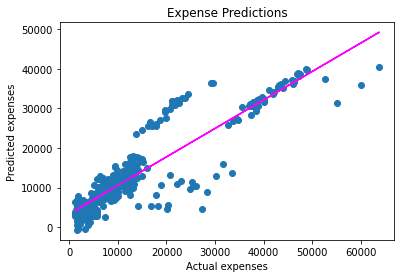

In [26]:
plt.scatter(Y_test, predictions1)
plt.xlabel('Actual expenses')
plt.ylabel('Predicted expenses')
plt.title('Expense Predictions')
# overlay the regression line
z = np.polyfit(Y_test, predictions1, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test), color='magenta')
plt.show()

# 5- Tester un autre algorithme de régression

###### Test avec l'algorithme **Lasso**

Lasso() 

MSE: 35623440.42615831
RMSE: 5968.5375450070105
R2: 0.7939767619578373


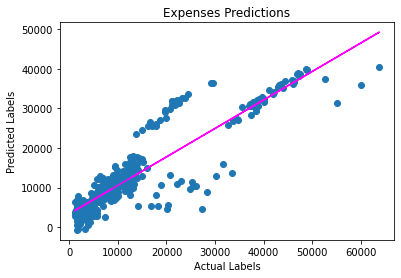

In [27]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model2 = Lasso().fit(X_train, Y_train)
print (model2, "\n")

# Evaluate the model using the test data
predictions3 = model2.predict(X_test)
mse = mean_squared_error(Y_test, predictions3)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(Y_test, predictions3)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(Y_test, predictions3)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Expenses Predictions')
# overlay the regression line
z = np.polyfit(Y_test, predictions3, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test), color='magenta')
plt.show()

### Observations:

L'algorithme Lasso est aussi performant que pour le score R2 avec la regression linéaire.

RandomForestRegressor() 

MSE: 26302591.48668937
RMSE: 5128.605218447738
R2: 0.8478826019564121


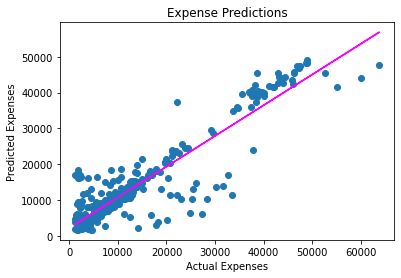

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model3 = RandomForestRegressor().fit(X_train, Y_train)
print (model3, "\n")

# Evaluate the model using the test data
predictions4 = model3.predict(X_test)
mse = mean_squared_error(Y_test, predictions4)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(Y_test, predictions4)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(Y_test, predictions4)
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.title('Expense Predictions')
# overlay the regression line
z = np.polyfit(Y_test, predictions4, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test), color='magenta')
plt.show()

### Observations :

En utilisant le RandomForestRegressor pour entrainer le modèle on obtient de bien meilleurs performance !